In [1]:
import pandas as pd
import numpy as np

In [2]:
import  os

import numpy as np
import pandas as pd


from create_df_larger import read_df_larger
df, dfc, all_homes, appliance_min, national_average = read_df_larger()

df = df.rename(columns={'house_num_rooms':'num_rooms',
                        'num_occupants':'total_occupants',
                        'difference_ratio_min_max':'ratio_difference_min_max'})
K_min, K_max = 1,6
F_min, F_max=1,8

from all_functions import *
from features_larger import *

In [6]:
%matplotlib inline

In [44]:
df[(df['fridge_7']-mu).abs() > 1*st]['fridge_7']

59        6.499650
222     388.983551
3649    114.823883
3893      0.002050
5371    189.638702
7641    115.763283
Name: fridge_7, dtype: float64

In [47]:
df['fridge_7'].dropna().describe()

count     70.000000
mean      67.292657
std       46.848750
min        0.002050
25%       51.904145
50%       58.622160
75%       69.421242
max      388.983551
Name: fridge_7, dtype: float64

In [67]:
out = {}
sd = 3
for appliance in ['fridge','dw','wm','mw','hvac','oven']:
    out[appliance] = {}
    for month in range(1, 13):
        mu=df['%s_%d' %(appliance, month)].mean()
        st = df['%s_%d' %(appliance, month)].std()
        nr =1.0*len(df[(df['%s_%d' %(appliance, month)]-mu).abs() > sd*st]['%s_%d' %(appliance, month)])
        dr = len(df['%s_%d' %(appliance, month)].dropna())
        
        out[appliance][month] = 100*nr/dr

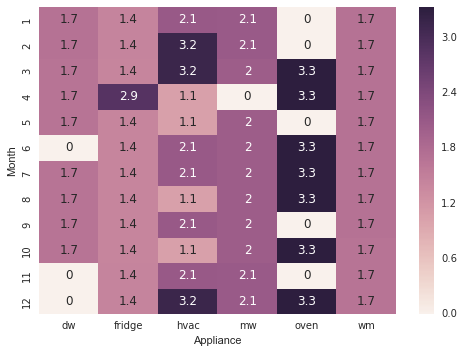

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pd.DataFrame(out),annot=True)
plt.xlabel("Appliance")
plt.ylabel("Month")